In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
os.getcwd()
os.listdir('.')
print(os.getcwd())
print(os.chdir('/content/drive/MyDrive/Proj_colab'))



/content/drive/My Drive/Proj_colab
None


In [63]:
# %% Read the original data and drop the columns
originalD = pd.read_csv('data/Original_data.csv', low_memory=False)
#originalD = pd.read_csv('data/Original_data.csv', low_memory=False)
original_F = originalD.drop(['birthyr','faminc','employ','marstat','child18','pid3','pid7','votereg','presvote16post','ideo5','newsint','inputstate'], axis = 1)
original_F


,id,gender,race,educ,region
0,371823339,1,1,2,2
1,398212310,1,1,2,3
2,392933925,1,1,1,1
3,372445135,1,1,2,2
4,392602384,1,1,2,3
...,...,...,...,...,...
4995,287972460,2,6,2,2
4996,137306469,2,6,2,3
4997,133663305,2,5,5,2
4998,77524502,2,7,6,3


In [64]:
# %% Read the breached  data and drop the columns
breachD = pd.read_csv('data/breached_data.csv', low_memory=False)
breach_F = breachD.drop(['Title','Domain','Name','BreachDate','AddedDate','ModifiedDate','IsSpamList','IsVerified','IsFabricated','IsSensitive','IsActive','IsRetired','PwnCount','LogoType','DataClasses'], axis = 1)
breach_F.loc[:,'Breached'] ='1'
breach_F["Breached"] = breach_F["Breached"].astype(object).astype(int)
breach_F

,id,Breached
0,135664815,1
1,355286483,1
2,355286483,1
3,355286483,1
4,339141795,1
...,...,...
14974,131884325,1
14975,131884325,1
14976,131884325,1
14977,131884325,1


In [65]:
breach_F1 = breach_F.drop_duplicates(subset =["id"] )
breach_F1["Breached"].replace({1: 0},inplace = True)
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
#breach_F = breach_
#breach_F.loc[:,'Breached'] ='1'
breach_F1

,id,Breached
0,135664815,0
1,355286483,0
4,339141795,0
5,341961164,0
6,374206867,0
...,...,...
14960,137327203,0
14963,334328189,0
14967,151192859,0
14973,152094711,0


In [66]:
df3 = pd.merge(breach_F, breach_F1, how='outer')
df3

,id,Breached
0,135664815,1
1,355286483,1
2,355286483,1
3,355286483,1
4,339141795,1
...,...,...
19116,137327203,0
19117,334328189,0
19118,151192859,0
19119,152094711,0


In [67]:
# %% Merge the two files
fin_dat = pd.merge(original_F, df3, on='id', how='inner')
print("Number of rows in the final dataset: ", fin_dat.shape[0])
fin_dat.head(5)


Number of rows in the final dataset:  19121


,id,gender,race,educ,region,Breached
0,371823339,1,1,2,2,1
1,371823339,1,1,2,2,1
2,371823339,1,1,2,2,0
3,392933925,1,1,1,1,1
4,392933925,1,1,1,1,1


In [68]:
print(fin_dat.dtypes)

id          int64
gender      int64
race        int64
educ        int64
region      int64
Breached    int64
dtype: object


In [69]:
#input
x=fin_dat.drop('Breached',axis=1)
y= fin_dat.Breached
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#printing shapes of testing and training sets :
print("shape of original dataset :", fin_dat.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (19121, 6)
shape of input - training set (15296, 5)
shape of output - training set (15296,)
shape of input - testing set (3825, 5)
shape of output - testing set (3825,)


In [74]:
# prepare configuration for cross validation test harness
seed = 8

In [76]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [77]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.782624 (0.008729)
LDA: 0.782624 (0.008729)
KNN: 0.759349 (0.009431)
CART: 0.622123 (0.012123)
NB: 0.782624 (0.008729)
SVM: 0.782624 (0.008729)


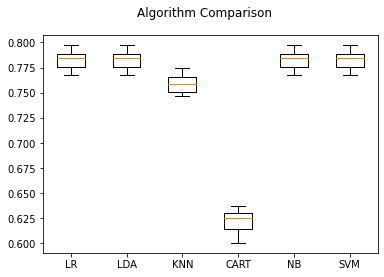

In [78]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()